In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2c-data"

# **3. Logistic Regression**

Logistic regression is an algorithm that estimates the parameters, or coefficients, of the linear combination
of the logit model. The logistic or logit model is used to predict the probability 'p' of a binary dependent variable taking on one of two possible outcomes. This feature makes Logistic Regression useful even in problems of binary classification

**Exploring the Factors Influencing Electric Vehicle Adoption**

In recent years, the push towards sustainable living and reducing carbon footprints has intensified globally. Among the many initiatives aimed at achieving this, the adoption of electric vehicles (EVs) stands out as a critical measure.Car manufacturers have all been actively promoting the transition from traditional gasoline-powered vehicles to electric ones.

To better understand the dynamics of this transition, a comprehensive study was conducted to explore the factors influencing individuals' decisions to adopt electric vehicles.The dataset aims to provide valuable insights into the key predictors that drive or hinder the adoption of EVs.

Data Dictionary:
ID: A unique identifier assigned to each individual in the study

Gender: The gender of the individual, categorized as Male or Female.

Age: The age of the individual in years

Annual Income: The annual income of the individual

Electric Vehicle Adoption: A categorical variable indicating whether the individual owns an electric vehicle (0/1). This is the target variable of the study, helping to identify the proportion of adopters and non-adopters.

In [2]:
df <- read.csv("/kaggle/input/2c-data/2c-data.csv")
head(df)

,ID,Gender,Age,Annual_Income,Electric_Vehicle_Adoption
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


**1)** Fit a logistic regression model to classify the target variable(Electric Vehicle Adoption)<br>
Hint: Use glm()        (3 marks)


In [3]:
##Convert categorical variables (Gender)
df$Gender_numeric <- ifelse(df$Gender == "Male", 0, 1)
head(df)
## Write your code here

model <- glm(Electric_Vehicle_Adoption ~ Gender_numeric + Age +Annual_Income, family = binomial, data = df)
 
# View the summary of the model
summary(model)

,ID,Gender,Age,Annual_Income,Electric_Vehicle_Adoption,Gender_numeric
,<int>,<chr>,<int>,<int>,<int>,<dbl>
1,15624510,Male,19,19000,0,0
2,15810944,Male,35,20000,0,0
3,15668575,Female,26,43000,0,1
4,15603246,Female,27,57000,0,1
5,15804002,Male,19,76000,0,0
6,15728773,Male,27,58000,0,0



Call:
glm(formula = Electric_Vehicle_Adoption ~ Gender_numeric + Age + 
    Annual_Income, family = binomial, data = df)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.245e+01  1.309e+00  -9.510  < 2e-16 ***
Gender_numeric -3.338e-01  3.052e-01  -1.094    0.274    
Age             2.370e-01  2.638e-02   8.984  < 2e-16 ***
Annual_Income   3.644e-05  5.473e-06   6.659 2.77e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 521.57  on 399  degrees of freedom
Residual deviance: 275.84  on 396  degrees of freedom
AIC: 283.84

Number of Fisher Scoring iterations: 6


**2)** What can u interpret from the summary of the model?         (2 marks)

The intercept is negative. Indicating when all the predictor variables are equal to zero, the log-odds of the outcome is negative or a low probability of the event. <br>
Gender: The p-value 0.274 indicates that it is not statistcally significant.Hence gender does not have a significant effect on electric vehicle adoption in this model. <br>
Age: P-value <2e-16 means it is highly statiscally significant.For every one-year increase in age, the log-odds of adopting an electric vehicle increase by 0.237. This is a significant predictor, implying that older individuals are more likely to adopt electric vehicles.

Annual Income: P-value of 2.77e-11 indicates high statiscal significance. As income increases by one unit, the log-odds of adopting an electric vehicle increase slightly, but significantly. Though the effect size is small, income plays an important role in predicting electric vehicle adoption.

**3)** Plot the ROC curve and find the AUC value            (3 marks)

In [4]:
if (!requireNamespace("ROCR", quietly = TRUE)) {
    install.packages("ROCR")
}

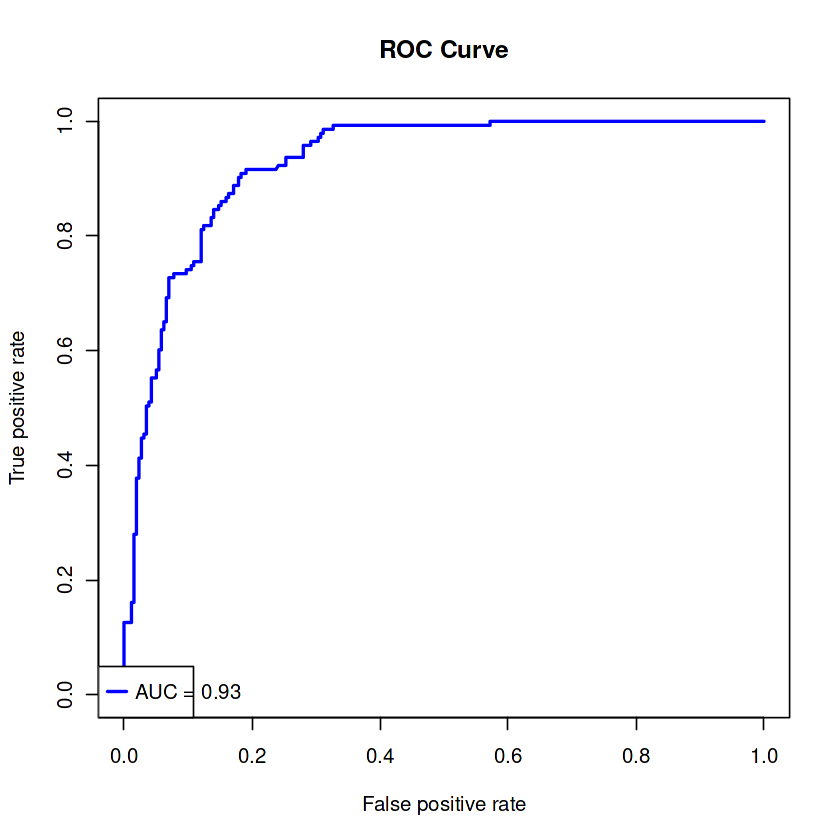

In [5]:

library(ROCR)
# Make predictions on the dataset
predictions <- predict(model, type = "response")
 
# Create a prediction object for ROCR
prediction_objects <- prediction(predictions,df$Electric_Vehicle_Adoption)
 
# Create an ROC curve object
roc_object <- performance(prediction_objects, measure = "tpr", x.measure = "fpr")
 
# Plot the ROC curve
plot(roc_object, main = "ROC Curve", col = "blue", lwd = 2)
 
# Add labels and a legend to the plot
auc <- performance(prediction_objects, measure = "auc")
auc_value <- auc@y.values[[1]]

# Add labels and a legend to the plot
legend("bottomleft",legend = paste("AUC =", round(auc_value, 2)), col = "blue", lwd = 2)

**4)** What can you interpret from the ROC curve and AUC value?    (2 marks)

This ROC curve shows that the classifier being evaluated has very good discriminative ability, as indicated by the high AUC value and the shape of the curve that approaches the top-left corner of the plot.

# **Good job with the analysis!**
